# Лабораторная работа 5. Логистическая регрессия

### Задание 1. Построить модель линейной регрессии

**Задание 1.1.** Постройте модель линейной регрессии (с функцией ошибки MSE, без регуляризации) для датасета из лекции.  

Можно использовать функцию построения модели на основе нормального уравнения из первой работы.  

Выведите веса модели.

In [395]:
import numpy as np
import matplotlib.pyplot as plt

In [396]:
x = np.array([1, 2, 3, 5, 6, 7])
y = np.array([0, 0, 0, 1, 1, 1])

In [397]:
def get_weights(X, y):
    X = X.reshape(-1, 1)
    X_c = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

    return np.linalg.inv(X_c.T.dot(X_c)).dot(X_c.T).dot(y)


def get_prediction(x, weights):
    return weights[1] * x + weights[0]

In [398]:
print(f"веса модели {get_weights(x, y)}")

веса модели [-0.35714286  0.21428571]


**Задание 1.2.** Нарисуйте датасет и модель на плоскости:

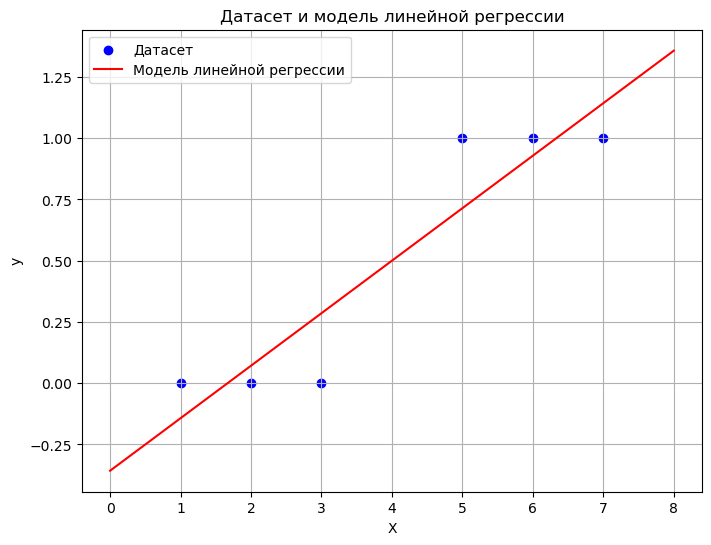

In [399]:
x_range = np.linspace(0, 8, 100)
y_pred = get_prediction(x_range, get_weights(x, y))

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Датасет')
plt.plot(x_range, y_pred, color='red', label='Модель линейной регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Датасет и модель линейной регрессии')
plt.legend()
plt.grid(True)
plt.show()

### Задание 2. Выведите выражение для изменения весов в алгоритме градиентного спуска
Напишите на листке вывод градиента функции ошибки кросс-энтропия в векторно-матричном виде и для отдельного компонента.  

Отдельно выведите выражение производной сигмоидальной функции через саму функцию.  

Приведите также полное выражение для изменения весов в алгоритме градиентного спуска – в векторно-матричном виде и для отдельного компонента.

### Задание 3. Напишите функцию обучения логистической регрессии на основе кросс-энтропии и градиентного спуска

**Задание 3.1.** Напишите и протестируйте функцию сигмоиды. Нарисуйте её график и график её производной.

In [400]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

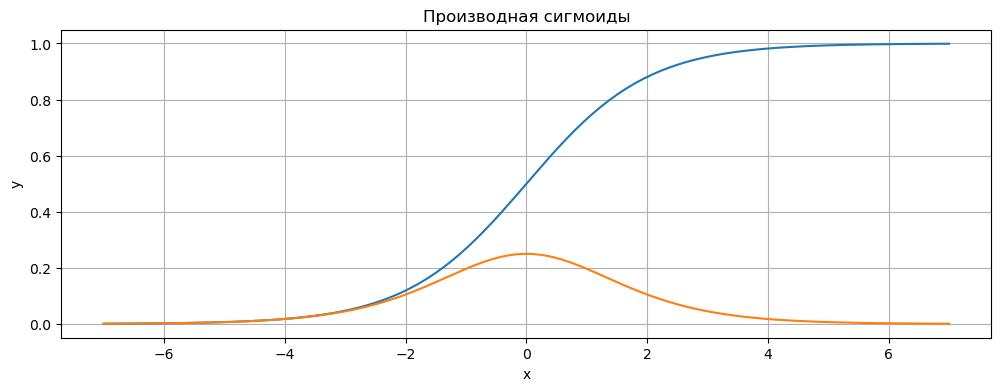

In [401]:
z = np.linspace(-7, 7, 200)
plt.figure(figsize=(12, 4))

plt.plot(z, sigmoid(z))
plt.title('Сигмоида')
plt.plot(z, sigmoid_derivative(z))
plt.title('Производная сигмоиды')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

**Задание 3.2.** Напишите функцию ошибки кросс-энтропия.

In [402]:
def cross_entropy_loss(y, y_pred):
    epsilon = 1e-15  # Чтобы избежать log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

**Задание 3.3.** Напишите функцию нахождения весов логистической регрессии на основе градиентного спуска.  

Дополнительно сохраняйте историю изменения ошибки (в следующем задании потребуется её нарисовать).

In [403]:
def logistic_regression_gradient(x, y, learning_rate=0.1, num_iterations=1000):
    n = x.shape[0]
    X = np.column_stack((np.ones(n), x))
    weights = np.zeros(2)
    history = []  # Для хранения истории ошибки
    for _ in range(num_iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        error = predictions - y
        gradient = np.dot(X.T, error) / n
        weights -= learning_rate * gradient
        loss = cross_entropy_loss(y, predictions)
        history.append(loss)
        
    return weights, history

**Задание 3.4.** С помощью написанной функции постройте модель логистической регрессии для датасета из лекции (см. начало работы).  

Задайте скорость обучения и количество шагов обучения.  

После построения модели выведите веса модели и график изменения ошибки (историю).

In [404]:

# Скорость обучения
lr = 0.01

# Количество шагов обучения
step_number = 10000

theta, loss_history = logistic_regression_gradient(x, y, learning_rate=lr, num_iterations=step_number)

In [405]:
print(f"веса модели {theta}")

веса модели [-5.76993716  1.53390767]


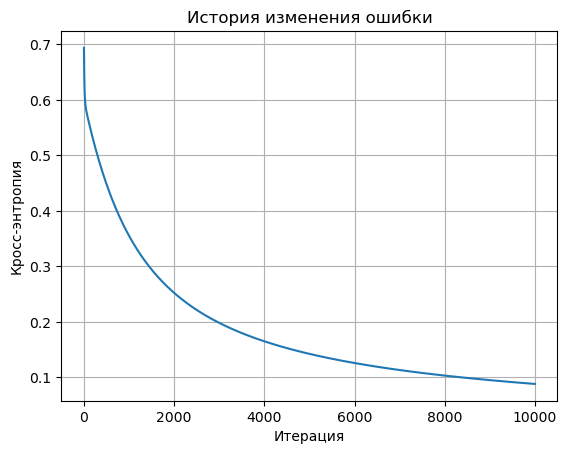

In [406]:
plt.plot(loss_history)
plt.title('История изменения ошибки')
plt.xlabel('Итерация')
plt.ylabel('Кросс-энтропия')
plt.grid(True)
plt.show()

**Задание 3.5.** Нарисуйте датасет и модели линейной регрессии и логистической регрессии на плоскости:

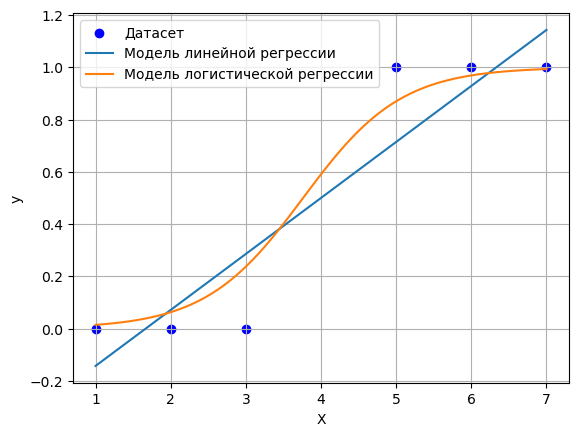

In [407]:
x_range = np.linspace(x.min(), x.max(), 100)

plt.scatter(x, y, color='blue', label='Датасет')
plt.plot(x_range, get_prediction(x_range, get_weights(x, y)), label='Модель линейной регрессии')
plt.plot(x_range, sigmoid(theta[0] + theta[1] * x_range), label='Модель логистической регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Задание 3.6.** Ответьте на вопрос: почему модель линейной регрессии не слишком подходит для решения задачи классификации?  

Проиллюстрируйте ответ, добавив в датасет далеко отстоящий пример (или примеры), перестроив и нарисовав снова обе модели – линейную и логистическую регрессии.

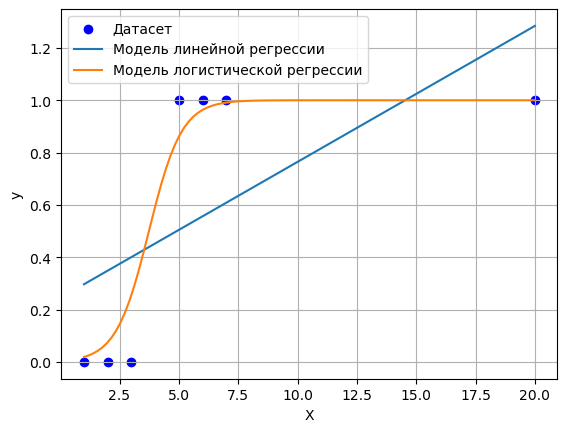

In [408]:
x = np.array([1, 2, 3, 5, 6, 7, 20])
y = np.array([0, 0, 0, 1, 1, 1, 1])

x_range = np.linspace(x.min(), x.max(), 100)

theta, learning_rate = logistic_regression_gradient(x, y, learning_rate=lr, num_iterations=step_number)
weights = get_weights(x, y)

plt.scatter(x, y, color='blue', label='Датасет')
plt.plot(x_range, get_prediction(x_range, weights), label='Модель линейной регрессии')
plt.plot(x_range, sigmoid(theta[0] + theta[1] * x_range), label='Модель логистической регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Линейная регрессия не разделяет на классы, в отличии от логистической

### Задание 4. Постройте прямую для аргумента логистической регрессии

**Задание 4.1.** Постройте модели линейной регрессии и логистической регрессии для исходного датасета.  

Выведите веса обеих моделей.

In [409]:
x = np.array([1, 2, 3, 5, 6, 7])
y = np.array([0, 0, 0, 1, 1, 1])

In [410]:
weights = get_weights(x, y)
theta, learning_rate = logistic_regression_gradient(x, y, learning_rate=lr, num_iterations=step_number)
print(f"веса линейной регрессии {weights}")
print(f"веса логистической регрессии {theta}")

веса линейной регрессии [-0.35714286  0.21428571]
веса логистической регрессии [-5.76993716  1.53390767]


**Задание 4.2.** Нарисуйте на одном графике:
- датасет;
- модель линейной регрессии;
- модель логистической регрессии;
- прямую для скалярного произведения $<\overrightarrow{w},\overrightarrow{x}>$ из модели логистической регрессии.

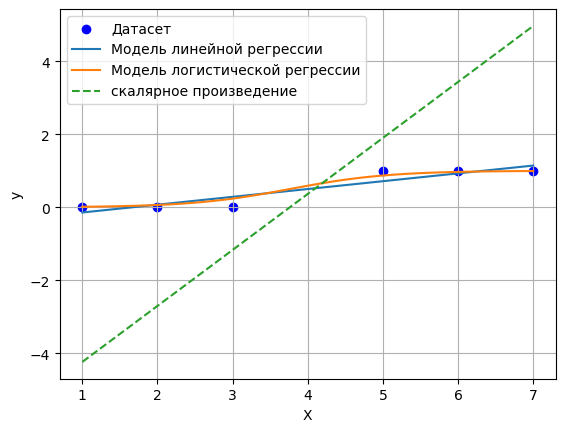

In [411]:
x_range = np.linspace(x.min(), x.max(), 100)
plt.scatter(x, y, color='blue', label='Датасет')
plt.plot(x_range, get_prediction(x_range, weights), label='Модель линейной регрессии')
plt.plot(x_range, sigmoid(theta[0] + theta[1] * x_range), label='Модель логистической регрессии')
plt.plot(x_range, theta[0] + theta[1] * x_range, linestyle='--', label='скалярное произведение')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Задание 4.3.** Ответьте на вопросы:  
- Почему прямая для аргумента логистической регрессии имеет такой вид?  
- Как наклон этой прямой связан с весами модели?
- Как наклон сигмоиды связан с весами модели?

1) 
2) 
3) Наклон сигмоиды определяется весами: чем больше веса, тем круче сигмоида.

### Задание 5. Сравните результаты с `scikit-learn`  

**Задание 5.1.** Постройте модель логистической регрессии для датасета из лекции с помощью класса `LogisticRegression` из `scikit-learn`.  
Выведите веса модели и сравните с весами логистической регрессии, построенной вами.

In [412]:
from sklearn.linear_model import LogisticRegression

In [413]:
clf = LogisticRegression(random_state=42, max_iter=step_number).fit(x.reshape(-1, 1), y)
print(f"веса библиотечной функции {clf.intercept_, clf.coef_}")
print(f"веса моей функции {theta}")

веса библиотечной функции (array([-4.41762958]), array([[1.10439993]]))
веса моей функции [-5.76993716  1.53390767]


**Задание 5.2.** Нарисуйте на одном графике:
- датасет;
- модель логистической регрессии, построенной вами;
- модель логистической регрессии, построенной с помощью `scikit-learn`.

Объясните, в чем причины отличий между моделями (если они будут иметь место).

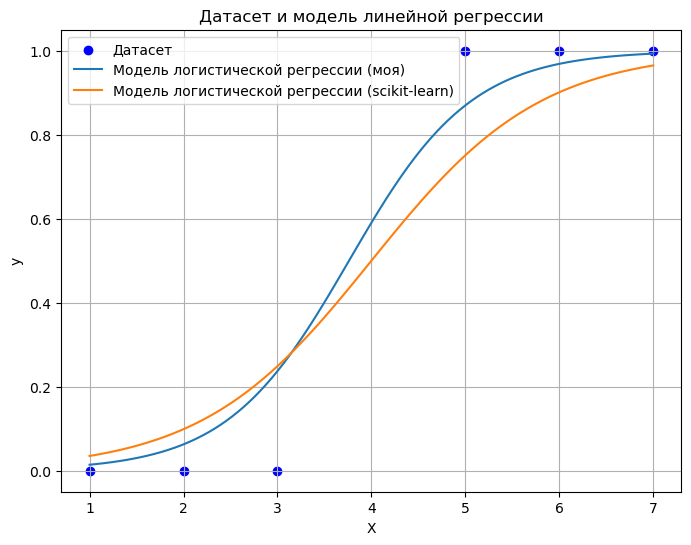

In [414]:
x_range = np.linspace(x.min(), x.max(), 100)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Датасет')
plt.plot(x_range, sigmoid(theta[0] + theta[1] * x_range), label='Модель логистической регрессии (моя)')
plt.plot(x_range, sigmoid(clf.intercept_ + clf.coef_[0] * x_range), label='Модель логистической регрессии (scikit-learn)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Датасет и модель линейной регрессии')
plt.legend()
plt.grid(True)
plt.show()

### Задание 6. `SGDClassifier`
[`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) – класс из `scikit-learn`, реализующий градиентный спуск с разными функциями ошибки и, таким образом, соответствующий разным моделям:
- для функции ошибки `log_loss` (кросс-энтропия) – логистическая регрессия;
- для функции ошибки `hinge ` – метод опорных векторов (SVM);
- для функции ошибки `perceptron` – персептрон (вид нейронных сетей).  

С помощью `SGDClassifier` можно понять, что эти модели, несмотря на разные соображения, приведшие к их созданию, отличаются по большому счету только функциями ошибки, а градиентный спуск представляет собой универсальный метод оптимизации.

**Задание 6.1.** Постройте модель логистической регрессии для датасета из лекции с помощью `SGDClassifier`.  
Выведите веса модели и сравните их с весами своей модели и модели, построенной с помощью `LogisticRegression`.

In [415]:
from sklearn.linear_model import SGDClassifier

In [416]:
clf_sgdc = SGDClassifier(random_state=42).fit(x.reshape(-1, 1), y)
print(f"LogisticRegression {clf.intercept_, clf.coef_}")
print(f"SGDClassifier {clf_sgdc.intercept_, clf_sgdc.coef_}")

LogisticRegression (array([-4.41762958]), array([[1.10439993]]))
SGDClassifier (array([-39.64458122]), array([[9.44287063]]))
